<a href="https://colab.research.google.com/github/GenoKiller777/AprendizajeSupervisado/blob/main/TuningModeloEmailSpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spambase_complete.csv to spambase_complete.csv
User uploaded file "spambase_complete.csv" with length 703857 bytes


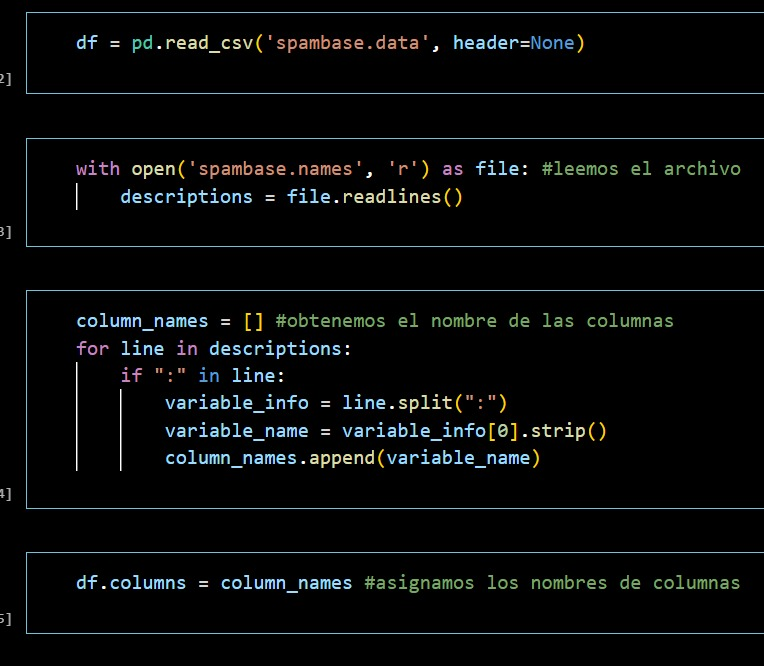

In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('spambase_complete.csv')
df.head(3)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


In [9]:
df.shape

(4601, 58)

In [5]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [ ]:
df.describe().T

In [65]:
df['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

## Modelo Antes de la Optimización.

### PreProcesamiento

In [51]:
X = df.iloc[:,0:57] #Matrix Features

y = df.iloc[:, 57] #Feature Target

### Validación Cruzada

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 33)

In [53]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X = X_train , y = y_train)

LogisticRegression()

In [56]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(X, y))

Intercept: [-1.2733789]
Coeficiente: [('word_freq_make', -0.014443555949719085), ('word_freq_address', -0.27636848965251964), ('word_freq_all', 0.08284573753781628), ('word_freq_3d', 0.16966782268620856), ('word_freq_our', 0.7227748102814027), ('word_freq_over', 0.347697541853225), ('word_freq_remove', 0.9052460309707374), ('word_freq_internet', 0.5794854816902629), ('word_freq_order', 0.16106496264634046), ('word_freq_mail', 0.2759280791567594), ('word_freq_receive', 0.18268966051698754), ('word_freq_will', -0.2313721431252161), ('word_freq_people', 0.06840255953211485), ('word_freq_report', 0.05040008448151004), ('word_freq_addresses', 0.1893679516482262), ('word_freq_free', 0.9635881423727654), ('word_freq_business', 0.5401270801986807), ('word_freq_email', 0.33402380011197147), ('word_freq_you', 0.10658557702388811), ('word_freq_credit', 0.3995664447299653), ('word_freq_your', 0.27646492861819155), ('word_freq_font', 0.07950500924801515), ('word_freq_000', 0.7729355901720089), ('wo

In [57]:
predicciones = modelo.predict(X_test)

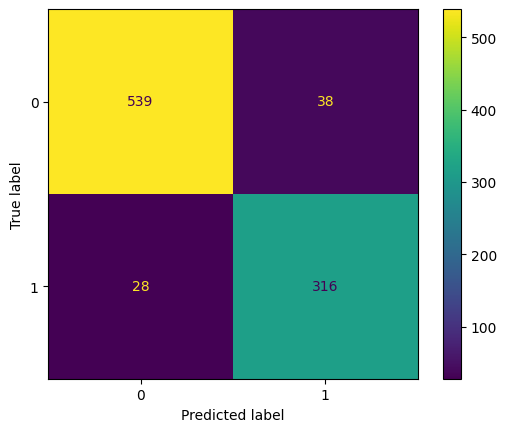

In [60]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [62]:
tn, fp, fn, tp = confusion_matrix(y_test, predicciones).ravel()
specificity_1 = tn / (tn+fp)

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

rc_1 = recall_score(y_test, predicciones)
ac_1 = accuracy_score(y_test, predicciones)
f1_1= f1_score(y_test, predicciones)
ps_1= precision_score(y_test, predicciones)

print("Métricas de Regresión Logística.")
print('')
print("Recall (Sensibilidad o Exhaustividad):",round(rc_1*100,3),"%.")
print("Accuracy (Exactitud):",round(ac_1*100,3),"%.")
print("Precision (Precisión):",round(ps_1*100,3),"%.")
print("Specifity:",round(specificity_1*100,3),"%.")
print("F1:",round(f1_1*100,3),"%.")

Métricas de Regresión Logóstica.

Recall (Sensibilidad o Exhaustividad): 91.86 %.
Accuracy (Exactitud): 92.834 %.
Precision (Precisión): 89.266 %.
Specifity: 93.414 %.
F1: 90.544 %.


## Aplique técnicas de balanceo de datos.

In [63]:
from sklearn.utils import resample

df_majority = df[df['spam'] == 0]
df_minority = df[df['spam']== 1]

df_majority_downsampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

In [64]:
df_balanced['spam'].value_counts()

0    1813
1    1813
Name: spam, dtype: int64

In [66]:
X_balanced = df_balanced.iloc[:,0:57]

y_balanced = df_balanced.iloc[:, 57]

In [67]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced,
                                                    test_size = 0.20,
                                                    random_state = 33)

## Aplique técnicas de optimatizacion de hiperparámetros.

In [88]:
from sklearn.model_selection import GridSearchCV

grid = {"C": np.logspace(-3,3,7),
      "max_iter":[10,100,1000,10000],
      "solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

logreg_cv = GridSearchCV(LogisticRegression() , grid , refit = True, verbose = 5, cv = 10)

In [89]:
logreg_cv.fit(X_train_balanced, y_train_balanced)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
[CV 1/10] END C=0.001, max_iter=10, solver=lbfgs;, score=0.521 total time=   0.0s
[CV 2/10] END C=0.001, max_iter=10, solver=lbfgs;, score=0.514 total time=   0.0s
[CV 3/10] END C=0.001, max_iter=10, solver=lbfgs;, score=0.507 total time=   0.0s
[CV 4/10] END C=0.001, max_iter=10, solver=lbfgs;, score=0.503 total time=   0.0s
[CV 5/10] END C=0.001, max_iter=10, solver=lbfgs;, score=0.510 total time=   0.0s
[CV 6/10] END C=0.001, max_iter=10, solver=lbfgs;, score=0.534 total time=   0.0s
[CV 7/10] END C=0.001, max_iter=10, solver=lbfgs;, score=0.517 total time=   0.0s
[CV 8/10] END C=0.001, max_iter=10, solver=lbfgs;, score=0.521 total time=   0.0s
[CV 9/10] END C=0.001, max_iter=10, solver=lbfgs;, score=0.524 total time=   0.0s
[CV 10/10] END C=0.001, max_iter=10, solver=lbfgs;, score=0.517 total time=   0.0s
[CV 1/10] END C=0.001, max_iter=10, solver=liblinear;, score=0.686 total time=   0.0s
[CV 2/10] END C=0.001, max_i

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [10, 100, 1000, 10000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=5)

In [92]:
print(logreg_cv.best_estimator_)

LogisticRegression(C=1000.0, solver='liblinear')


In [95]:
predicciones_balanced = logreg_cv.best_estimator_.predict(X_test_balanced)

In [98]:
tn_2, fp_2, fn_2, tp_2 = confusion_matrix(y_test_balanced, predicciones_balanced).ravel()
specificity_2 = tn_2 / (tn_2+fp_2)

rc_2 = recall_score(y_test_balanced, predicciones_balanced)
ac_2 = accuracy_score(y_test_balanced, predicciones_balanced)
f1_2= f1_score(y_test_balanced, predicciones_balanced)
ps_2= precision_score(y_test_balanced, predicciones_balanced)

print("Métricas de Regresión Logística - Balanceado - Grind Search.")
print('')
print("Recall (Sensibilidad o Exhaustividad):",round(rc_2*100,3),"%.")
print("Accuracy (Exactitud):",round(ac_2*100,3),"%.")
print("Precision (Precisión):",round(ps_2*100,3),"%.")
print("Specifity:",round(specificity_2*100,3),"%.")
print("F1:",round(f1_2*100,3),"%.")

Métricas de Regresión Logística - Balanceado - Grind Search.

Recall (Sensibilidad o Exhaustividad): 93.701 %.
Accuracy (Exactitud): 92.975 %.
Precision (Precisión): 92.969 %.
Specifity: 92.174 %.
F1: 93.333 %.


## Utilice parámetros de regularización.

In [99]:
grid_2 = {"C": np.logspace(-3,3,7),
          "penalty":["l1","l2"],
          "max_iter":[10,100,1000,10000],
          "solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

logreg_cv2 = GridSearchCV(LogisticRegression() , grid_2 , refit = True, verbose = 5, cv = 10)

In [100]:
logreg_cv2.fit(X_train_balanced, y_train_balanced)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits
[CV 1/10] END C=0.001, max_iter=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.001, max_iter=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.001, max_iter=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.001, max_iter=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=0.001, max_iter=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=0.001, max_iter=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=0.001, max_iter=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=0.001, max_iter=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=0.001, max_iter=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=0.001, max_iter=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/10] END 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=5)

In [101]:
print(logreg_cv2.best_estimator_)

LogisticRegression(penalty='l1', solver='liblinear')


In [102]:
predicciones_balanced2 = logreg_cv2.best_estimator_.predict(X_test_balanced)

In [103]:
tn_3, fp_3, fn_3, tp_3 = confusion_matrix(y_test_balanced, predicciones_balanced2).ravel()
specificity_3 = tn_3 / (tn_3+fp_3)

rc_3 = recall_score(y_test_balanced, predicciones_balanced2)
ac_3 = accuracy_score(y_test_balanced, predicciones_balanced2)
f1_3= f1_score(y_test_balanced, predicciones_balanced2)
ps_3= precision_score(y_test_balanced, predicciones_balanced2)

print("Métricas de Regresión Logística - Balanceado - Grind Search - Penalización.")
print('')
print("Recall (Sensibilidad o Exhaustividad):",round(rc_3*100,3),"%.")
print("Accuracy (Exactitud):",round(ac_3*100,3),"%.")
print("Precision (Precisión):",round(ps_3*100,3),"%.")
print("Specifity:",round(specificity_3*100,3),"%.")
print("F1:",round(f1_3*100,3),"%.")

Métricas de Regresión Logística - Balanceado - Grind Search - Penalización.

Recall (Sensibilidad o Exhaustividad): 93.963 %.
Accuracy (Exactitud): 93.388 %.
Precision (Precisión): 93.473 %.
Specifity: 92.754 %.
F1: 93.717 %.


## Compare los resultados del modelo antes de la optimaización y después de la optimización.

### Primer modelo

In [106]:
print("Métricas de Regresión Logística.")
print('')
print("Recall (Sensibilidad o Exhaustividad):",round(rc_1*100,3),"%.")
print("Accuracy (Exactitud):",round(ac_1*100,3),"%.")
print("Precision (Precisión):",round(ps_1*100,3),"%.")
print("Specifity:",round(specificity_1*100,3),"%.")
print("F1:",round(f1_1*100,3),"%.")

Métricas de Regresión Logística.

Recall (Sensibilidad o Exhaustividad): 91.86 %.
Accuracy (Exactitud): 92.834 %.
Precision (Precisión): 89.266 %.
Specifity: 93.414 %.
F1: 90.544 %.


### Segundo modelo

In [105]:
print("Métricas de Regresión Logística - Balanceado - Grind Search.")
print('')
print("Recall (Sensibilidad o Exhaustividad):",round(rc_2*100,3),"%.")
print("Accuracy (Exactitud):",round(ac_2*100,3),"%.")
print("Precision (Precisión):",round(ps_2*100,3),"%.")
print("Specifity:",round(specificity_2*100,3),"%.")
print("F1:",round(f1_2*100,3),"%.")

Métricas de Regresión Logística - Balanceado - Grind Search.

Recall (Sensibilidad o Exhaustividad): 93.701 %.
Accuracy (Exactitud): 92.975 %.
Precision (Precisión): 92.969 %.
Specifity: 92.174 %.
F1: 93.333 %.


### Tercer modelo

In [109]:
print("Métricas de Regresión Logística - Balanceado - Grind Search - Penalización.")
print('')
print("Recall (Sensibilidad o Exhaustividad):",round(rc_3*100,3),"%.")
print("Accuracy (Exactitud):",round(ac_3*100,3),"%.")
print("Precision (Precisión):",round(ps_3*100,3),"%.")
print("Specifity:",round(specificity_3*100,3),"%.")
print("F1:",round(f1_3*100,3),"%.")

Métricas de Regresión Logística - Balanceado - Grind Search - Penalización.

Recall (Sensibilidad o Exhaustividad): 93.963 %.
Accuracy (Exactitud): 93.388 %.
Precision (Precisión): 93.473 %.
Specifity: 92.754 %.
F1: 93.717 %.


## Elabore Conclusiones.

_El modelo con Balanceo, Grind Search y Penalización es el mejor modelo ya que el Balanceo calibra las clases, el Grind Search encuentra los mejores ajustes para los hiperparametros y la regulación consegue limitar la complejidad del mismo, lo unico que limita es el desgaste computacional del fit del propio modelo, entre el mejor modelo al peor modelo son solo 2 puntos porcentuales a lo cual a un problema real debe haber un Trade-Off entre buen poder predictivo y costo computacional._